In [32]:
import numpy as np
import sympy as sp
from sympy.solvers import solve
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-talk')


/tmp/ipykernel_1599/455203922.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/tmp/ipykernel_1599/455203922.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


# Characterizing stationary points
This notebook uses a symbolical calculation tool (`sympy`) to take the gradient of a function $f$ and find it's stationary points. Later, it computes the Hessian of $f$ to characterize these stationary points. You are to complete the code in order to characterize the found stationary points correctly.



## Declaring the function $f$
We will examine the following 3rd dregree function in R²:

In [33]:
x, y = sp.symbols('x y')
f = x**3 - 8*y**3 - 2*(x**2)*y + 4*x*(y**2) -4*x +8*y
f

x**3 - 2*x**2*y + 4*x*y**2 - 4*x - 8*y**3 + 8*y

Tip: you may try the same notebook with other functions later. All you need to do is write your function `f` using `x`  and `y`  as variables, and expressing any arithmetic operations in regular python language.

## $\vec\nabla f$: Gradient of f 
We'll use `sympy`'s function `diff`:

In [34]:
grad = sp.Matrix([sp.diff(f, var) for var in [x,y]])
grad

Matrix([
[  3*x**2 - 4*x*y + 4*y**2 - 4],
[-2*x**2 + 8*x*y - 24*y**2 + 8]])

## Stationary points

To find them, we need to solve for $\vec\nabla f = \vec0$. To do so, we use `sympy`'s function `nonlinsolve`:

In [35]:
st_points = sp.nonlinsolve(grad, (x,y))
st_points

{(-sqrt(2), -sqrt(2)/2), (sqrt(2), sqrt(2)/2), (-sqrt(6)/3, sqrt(6)/6), (sqrt(6)/3, -sqrt(6)/6)}

## Characterizing stationary points

### $\vec\nabla^2 f = H_f$: Hessian of f
We use `diff` again to take the second derivatives. Remember we need to take second derivatives with respecto to `x` and `y`, for each element in the gradient vector.

In [36]:
hess = sp.Matrix([[sp.diff(f, var) for var in [x,y]] for f in grad])
hess

Matrix([
[ 6*x - 4*y, -4*x + 8*y],
[-4*x + 8*y, 8*x - 48*y]])

### TODO Check for PD/SPD with determinant test
Use the determinant test to check the Hessia at each stationary point.
You can acecess the hessian elements like you would in a `numpy` matrix:

In [37]:
h11 = hess[0,0]
h22 = hess[1,1]
h12 = hess[0,1]

Complete the code bellow to compute the leading determinants `det1` and `det2`:

In [38]:
# TODO complete the code to compute det1 and det2 from h11, h22 and h12]
det1 = h11
det2 = h11*h22 - h12 **2
# visualize result
display(det1);display(det2)

6*x - 4*y

-(-4*x + 8*y)**2 + (6*x - 4*y)*(8*x - 48*y)

Now we loop through the stationary points and test the criteria.

**TODO** complete the code with a set of `if..else` statments that check the criteria and atribute a `label` among {`min`, `max`, `saddle point`} for each stationary point.

In [39]:
st_pts_labels = []  # list to store labels
for x_, y_ in st_points:
    print(f"st point: ({x_},{y_})")
    # compute numerical values for det1 and det2
    # replacing x and y with the current pont coordinates
    d1 = det1.subs({x: x_, y: y_})
    d2 = det2.subs({x: x_, y: y_})
    print("det1=", d1)
    print("det2=", d2)
    # Check the criteria to determine if point is max, min or saddle
    # TODO your code here
    if d1 > 0 and d2 > 0:
        label = 'min'
    elif d1 < 0 and d2 > 0:
        label = 'max'
    elif d2 < 0:
        label = 'saddle point'
    # print the decided label and append it to the list
    print(f"--> {label}")
    st_pts_labels.append(label)


st point: (sqrt(2),sqrt(2)/2)
det1= 4*sqrt(2)
det2= -128
--> saddle point
st point: (-sqrt(2),-sqrt(2)/2)
det1= -4*sqrt(2)
det2= -128
--> saddle point
st point: (-sqrt(6)/3,sqrt(6)/6)
det1= -8*sqrt(6)/3
det2= 128
--> max
st point: (sqrt(6)/3,-sqrt(6)/6)
det1= 8*sqrt(6)/3
det2= 128
--> min


# Plotting f and stationary points
The following cells plot f's level sets (a contour plot), along with the found stationary points and their labels.

In [40]:
# select a x and y range for the contour plat,
# as well as a delta for the step between points
xlim = -2, 2
ylim = -2, 2
# delta=0.25
# xspace = np.arange(*xlim,delta)
# yspace = np.arange(*ylim,delta)
# ow instead of delta, select a number of points
npts = 100
xspace = np.linspace(*xlim, npts)
yspace = np.linspace(*ylim, npts)

# Create a mesh for contour plot
X, Y = np.meshgrid(xspace, yspace)
# Calculate contour ndarray from sympy's function


def apply_fn(fn, X, Y):
    nrows, ncols = X.shape

    vs = [fn.n(subs={x: X[i, j], y:Y[i, j]})
        for i in range(nrows) for j in range(ncols)]
    result = np.array(vs).reshape(X.shape)

    return result


F = apply_fn(f, X, Y)
F=F.astype(float)

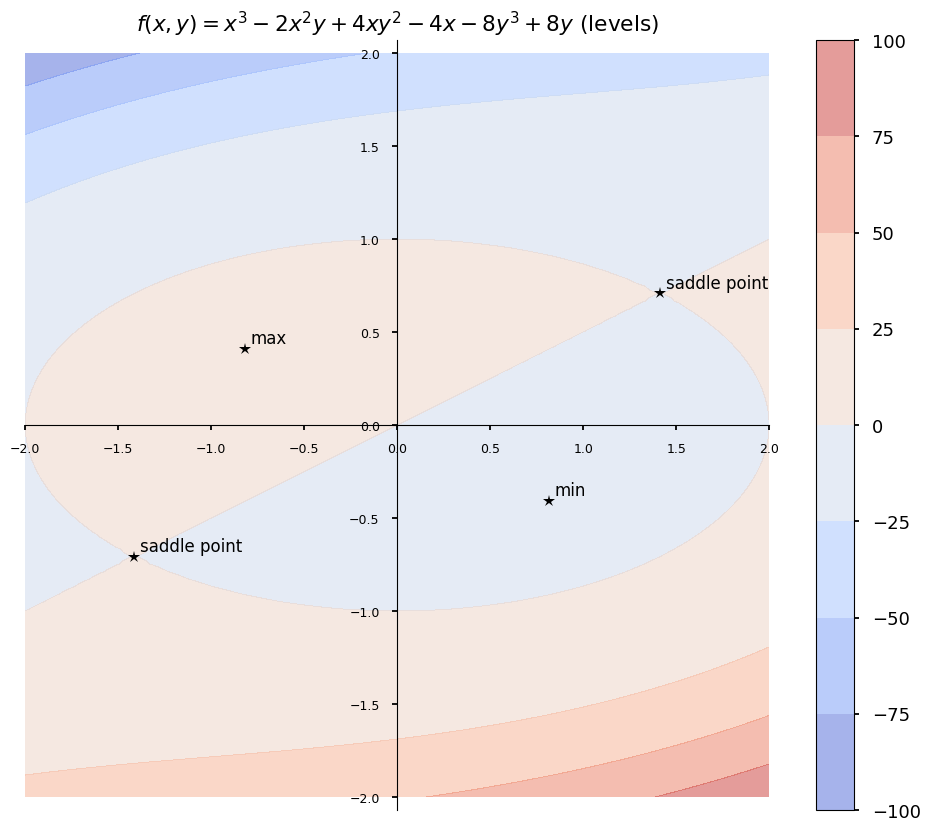

In [41]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 10))
# plotting f contours
plt.title(f"$f(x,y)={sp.latex(f)}$ (levels)")
CS = ax.contourf(X, Y, F,  cmap='coolwarm', alpha=0.5)
fig.colorbar(CS)
# plotting the stationary points with labels
num_s_points = list([(sp.N(x_), sp.N(y_)) for x_, y_ in st_points])
for (x_, y_), label in zip(num_s_points, st_pts_labels):
    plt.plot(x_, y_, "*", c='k')
    plt.annotate(label, xy=(x_, y_),xytext=(4, 4), textcoords='offset points',fontsize=12)

ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=9)

ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.margins(tight=True)
plt.axis('equal')
plt.show()
